Import Packages

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [4]:
parent_dir = '../../../data/thread_ring/4/'

N = 1_000_000
R = 100_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}5/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [5]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 19:02:09 2025 +0200) (510.92ms ela...,0.1810,0.0000,0.343,0.51,0.04,2.92,57.11 C,Nominal
1,(Fri Apr 18 19:02:09 2025 +0200) (508.43ms ela...,1.0900,0.0336,0.389,1.28,0.20,16.41,57.11 C,Nominal
2,(Fri Apr 18 19:02:10 2025 +0200) (507.50ms ela...,0.2220,0.0000,0.268,0.33,0.12,9.48,57.16 C,Nominal
3,(Fri Apr 18 19:02:10 2025 +0200) (509.73ms ela...,0.0508,0.0000,0.275,0.11,0.03,2.43,57.16 C,Nominal
4,(Fri Apr 18 19:02:11 2025 +0200) (508.60ms ela...,0.5590,0.0000,0.443,0.87,0.35,32.14,56.86 C,Nominal


In [6]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(556, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 19:02:20 2025 +0200) (1010.12ms el...,37.7,0.000,1.46,39.62,3.96,99.25,59.38 C,Nominal
1,(Fri Apr 18 19:02:21 2025 +0200) (1005.92ms el...,35.3,0.000,1.08,38.36,3.94,98.91,62.42 C,Nominal
2,(Fri Apr 18 19:02:22 2025 +0200) (1006.02ms el...,36.8,0.000,1.28,40.01,3.93,98.66,65.29 C,Nominal
3,(Fri Apr 18 19:02:23 2025 +0200) (1007.08ms el...,35.4,0.000,1.33,38.62,3.92,98.68,67.09 C,Nominal
4,(Fri Apr 18 19:02:24 2025 +0200) (1006.29ms el...,34.1,0.014,1.11,37.12,3.87,98.51,68.66 C,Nominal


In [7]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 19:14:55 2025 +0200) (511.16ms ela...,0.2380,0.0000,0.267,0.31,0.05,3.80,46.17 C,Nominal
1,(Fri Apr 18 19:14:56 2025 +0200) (508.91ms ela...,0.0999,0.0374,0.370,0.21,0.05,3.29,46.27 C,Nominal
2,(Fri Apr 18 19:14:56 2025 +0200) (508.94ms ela...,1.0800,0.0000,0.283,1.19,0.19,16.17,46.27 C,Nominal
3,(Fri Apr 18 19:14:57 2025 +0200) (508.08ms ela...,0.0818,0.0000,0.266,0.13,0.05,3.02,46.32 C,Nominal
4,(Fri Apr 18 19:14:57 2025 +0200) (508.34ms ela...,0.0597,0.0000,0.258,0.11,0.03,2.39,46.32 C,Nominal


In [8]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(645, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 19:15:07 2025 +0200) (1010.88ms el...,17.80,0.000000,0.720,18.54,2.21,95.75,47.41 C,Nominal
1,(Fri Apr 18 19:15:08 2025 +0200) (1006.54ms el...,17.60,0.000000,0.679,18.26,2.17,95.77,49.34 C,Nominal
2,(Fri Apr 18 19:15:09 2025 +0200) (1006.90ms el...,14.90,0.000000,0.778,15.64,1.84,97.88,50.87 C,Nominal
3,(Fri Apr 18 19:15:10 2025 +0200) (1007.24ms el...,9.79,0.000000,1.300,10.85,1.01,99.63,52.60 C,Nominal
4,(Fri Apr 18 19:15:11 2025 +0200) (1006.86ms el...,9.38,0.000424,1.280,11.73,1.12,99.46,53.89 C,Nominal


Clean the Data

In [9]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [10]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [11]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 19:02:09,0.1810,0.0000,0.343,0.51,0.04,2.92,57.11,Nominal,510.92
1,2025-04-18 19:02:09,1.0900,0.0336,0.389,1.28,0.20,16.41,57.11,Nominal,508.43
2,2025-04-18 19:02:10,0.2220,0.0000,0.268,0.33,0.12,9.48,57.16,Nominal,507.50
3,2025-04-18 19:02:10,0.0508,0.0000,0.275,0.11,0.03,2.43,57.16,Nominal,509.73
4,2025-04-18 19:02:11,0.5590,0.0000,0.443,0.87,0.35,32.14,56.86,Nominal,508.60


In [12]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(556, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 19:02:20,37.7,0.000,1.46,39.62,3.96,99.25,59.38,Nominal,1010.12
1,2025-04-18 19:02:21,35.3,0.000,1.08,38.36,3.94,98.91,62.42,Nominal,1005.92
2,2025-04-18 19:02:22,36.8,0.000,1.28,40.01,3.93,98.66,65.29,Nominal,1006.02
3,2025-04-18 19:02:23,35.4,0.000,1.33,38.62,3.92,98.68,67.09,Nominal,1007.08
4,2025-04-18 19:02:24,34.1,0.014,1.11,37.12,3.87,98.51,68.66,Nominal,1006.29


In [13]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 19:14:55,0.2380,0.0000,0.267,0.31,0.05,3.80,46.17,Nominal,511.16
1,2025-04-18 19:14:56,0.0999,0.0374,0.370,0.21,0.05,3.29,46.27,Nominal,508.91
2,2025-04-18 19:14:56,1.0800,0.0000,0.283,1.19,0.19,16.17,46.27,Nominal,508.94
3,2025-04-18 19:14:57,0.0818,0.0000,0.266,0.13,0.05,3.02,46.32,Nominal,508.08
4,2025-04-18 19:14:57,0.0597,0.0000,0.258,0.11,0.03,2.39,46.32,Nominal,508.34


In [14]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(645, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 19:15:07,17.80,0.000000,0.720,18.54,2.21,95.75,47.41,Nominal,1010.88
1,2025-04-18 19:15:08,17.60,0.000000,0.679,18.26,2.17,95.77,49.34,Nominal,1006.54
2,2025-04-18 19:15:09,14.90,0.000000,0.778,15.64,1.84,97.88,50.87,Nominal,1006.90
3,2025-04-18 19:15:10,9.79,0.000000,1.300,10.85,1.01,99.63,52.60,Nominal,1007.24
4,2025-04-18 19:15:11,9.38,0.000424,1.280,11.73,1.12,99.46,53.89,Nominal,1006.86


Visualize the Data

In [15]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


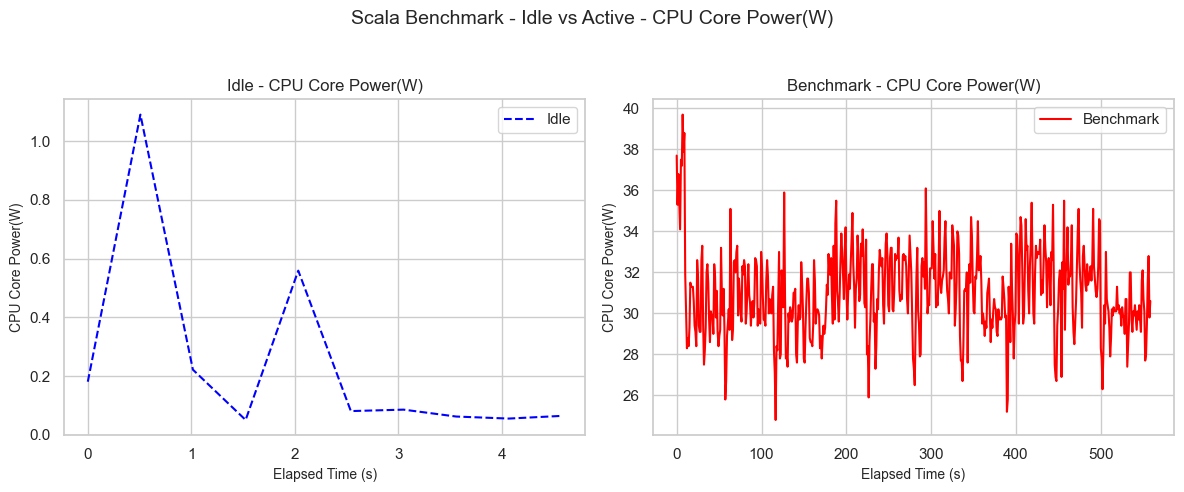

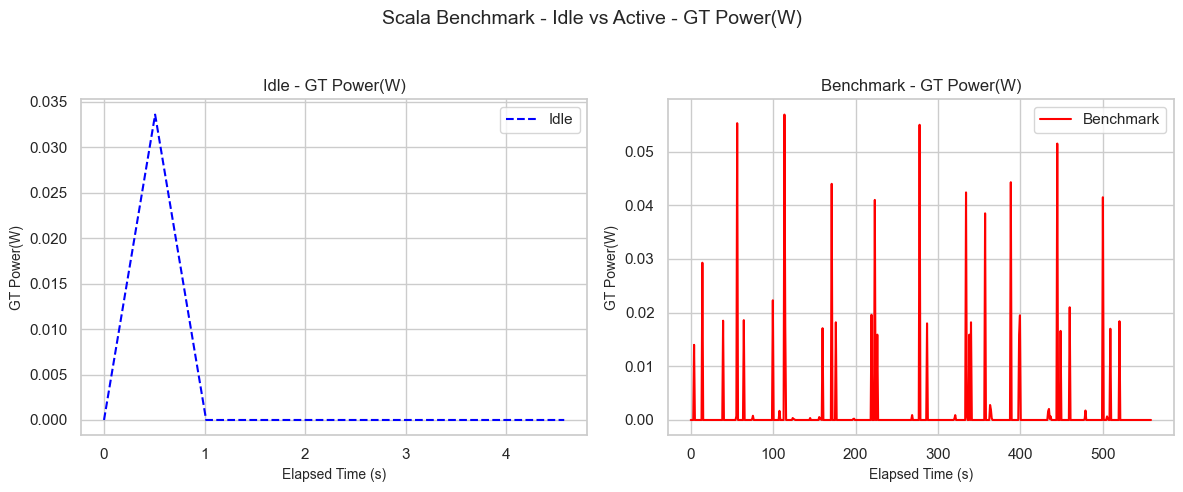

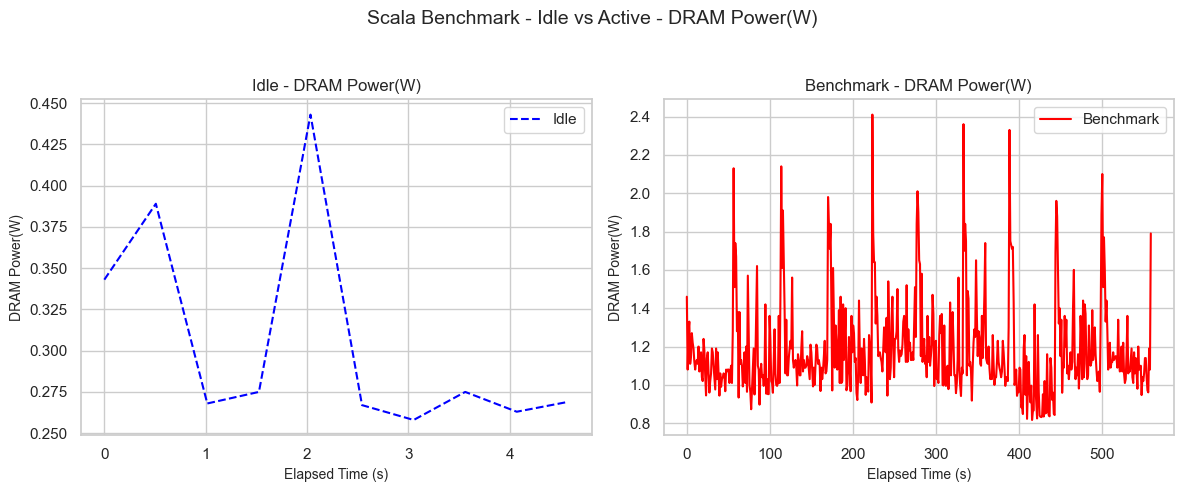

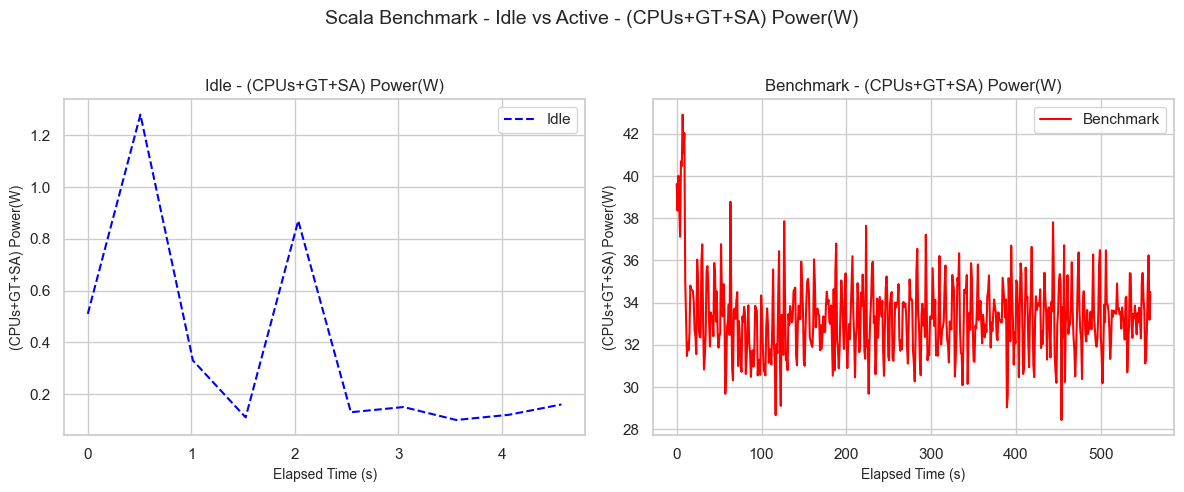

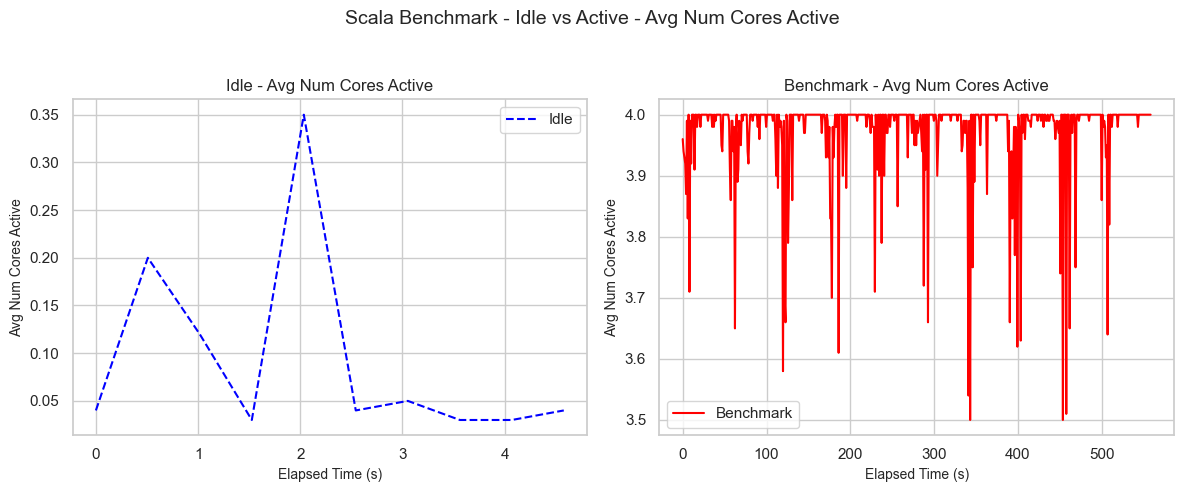

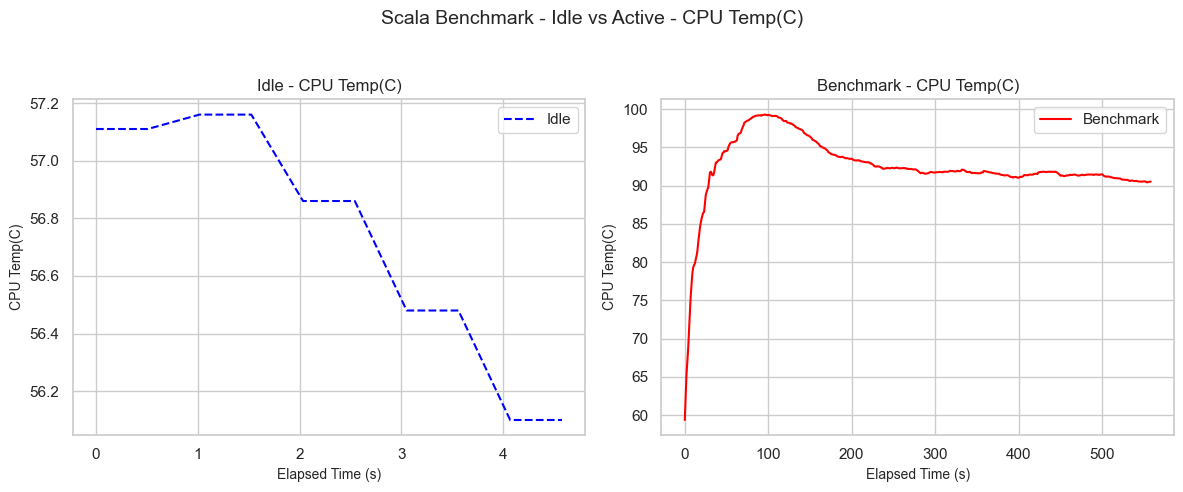

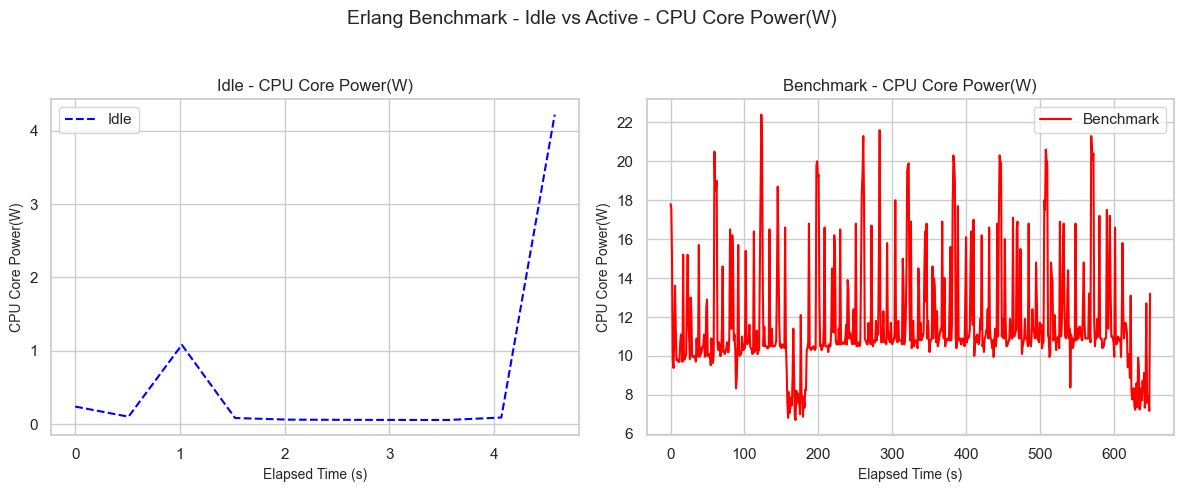

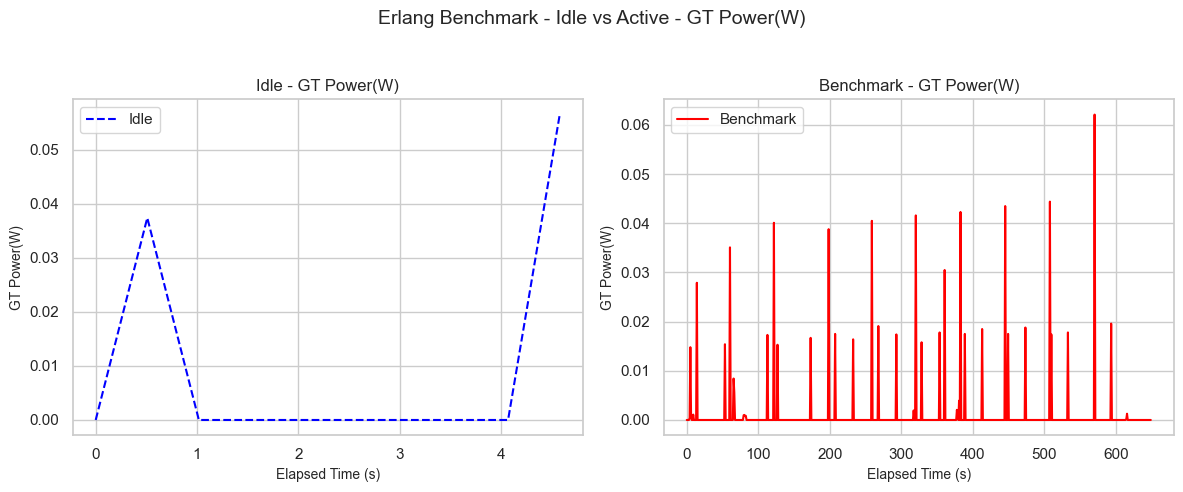

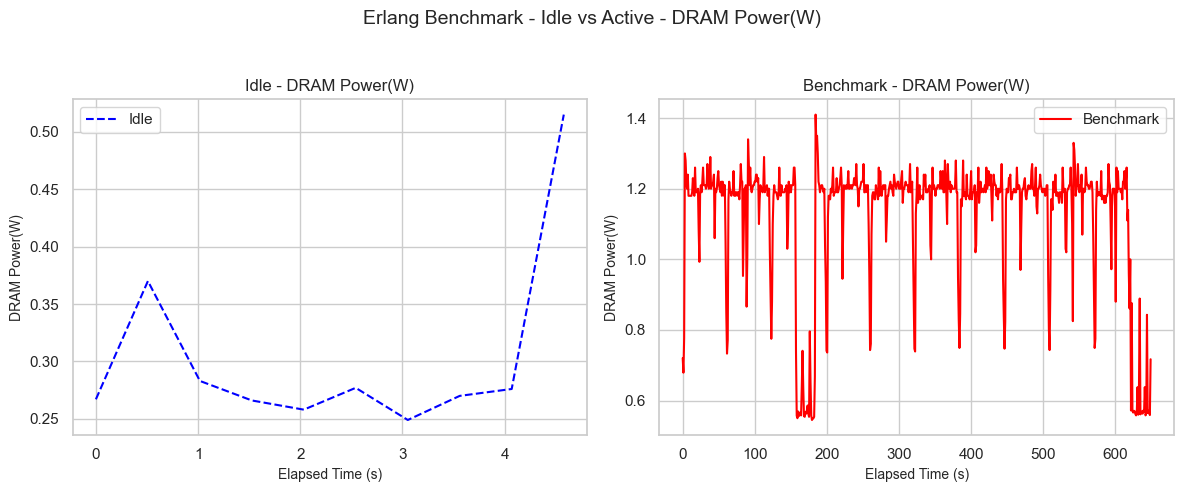

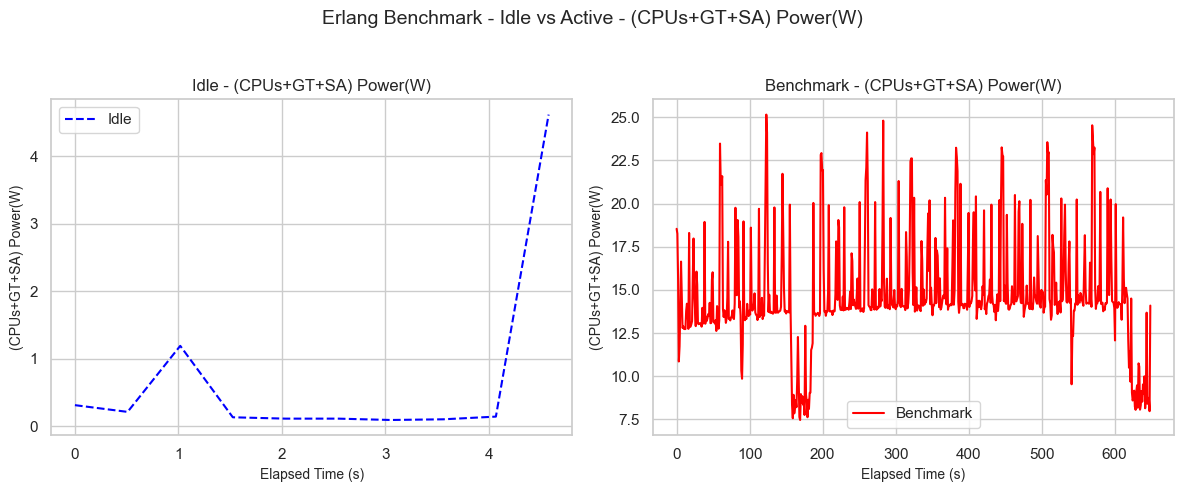

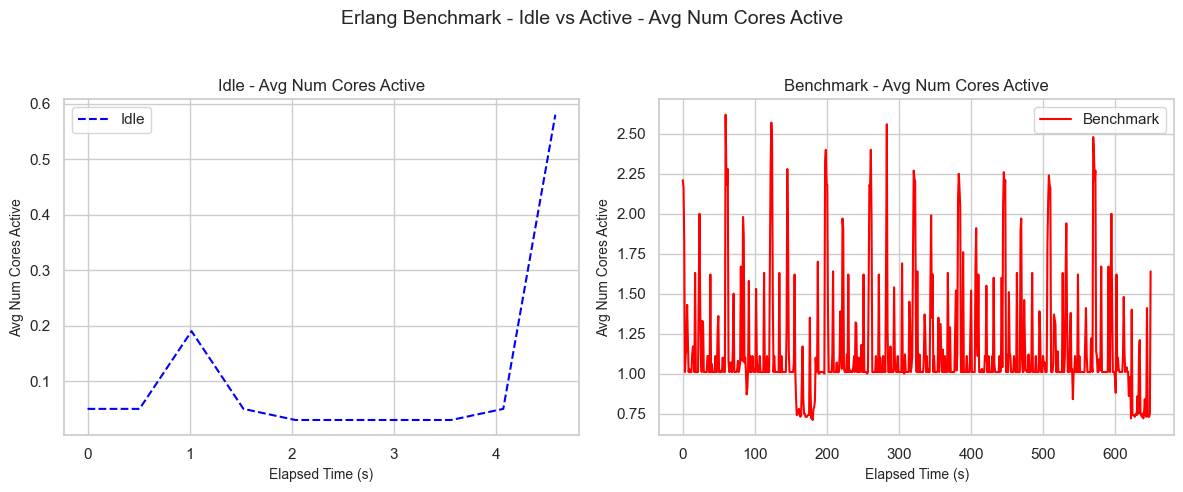

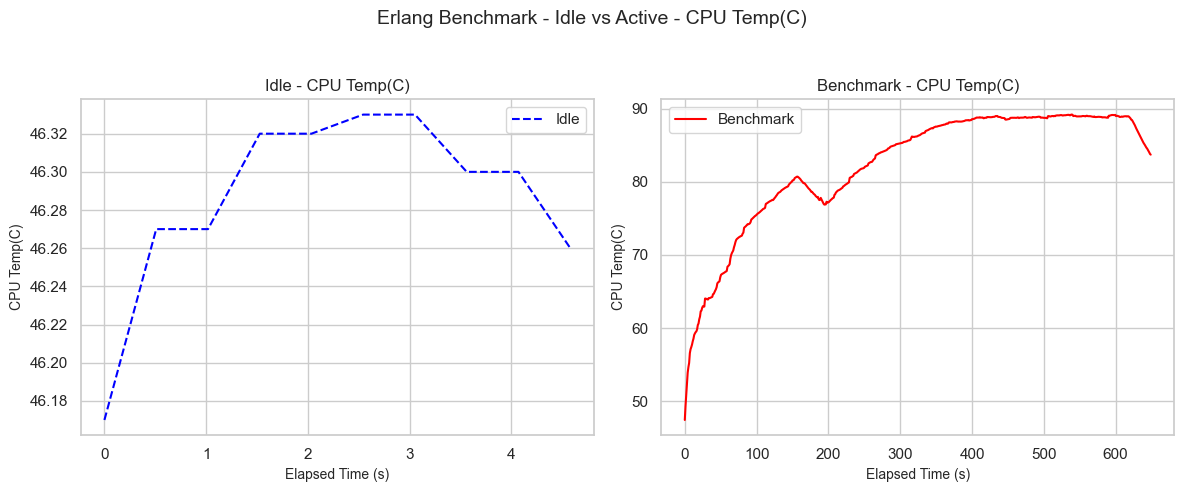

In [16]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [17]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [18]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

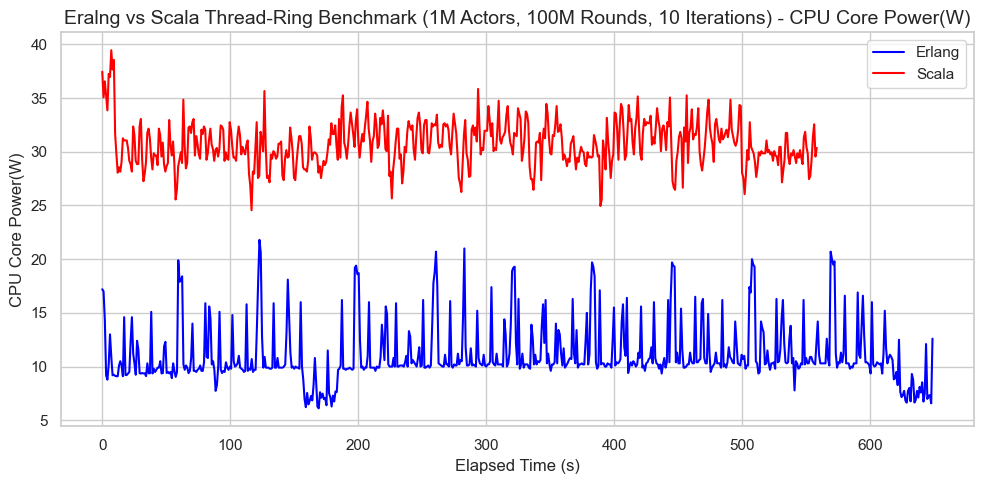

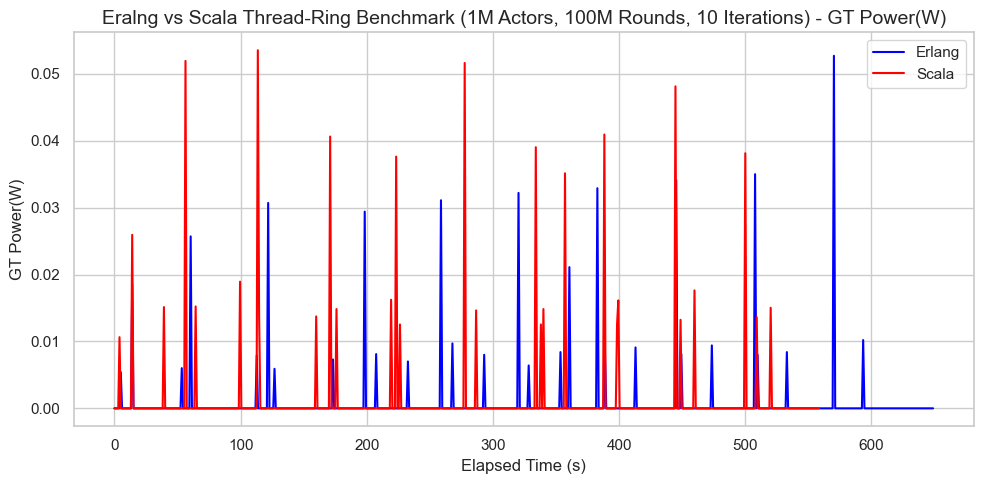

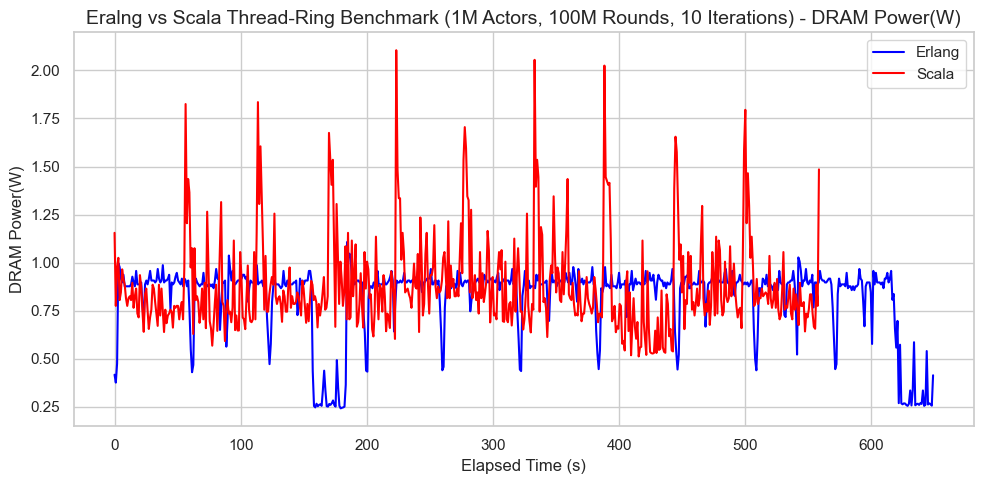

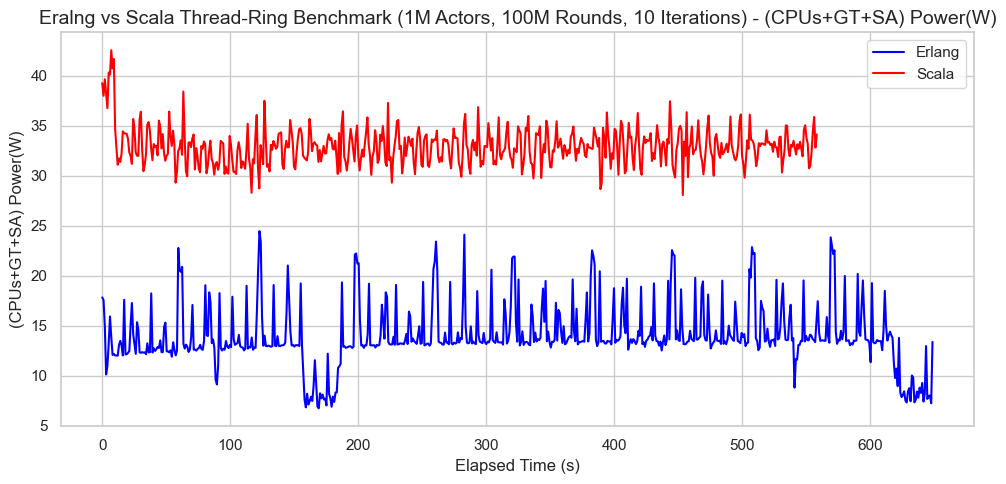

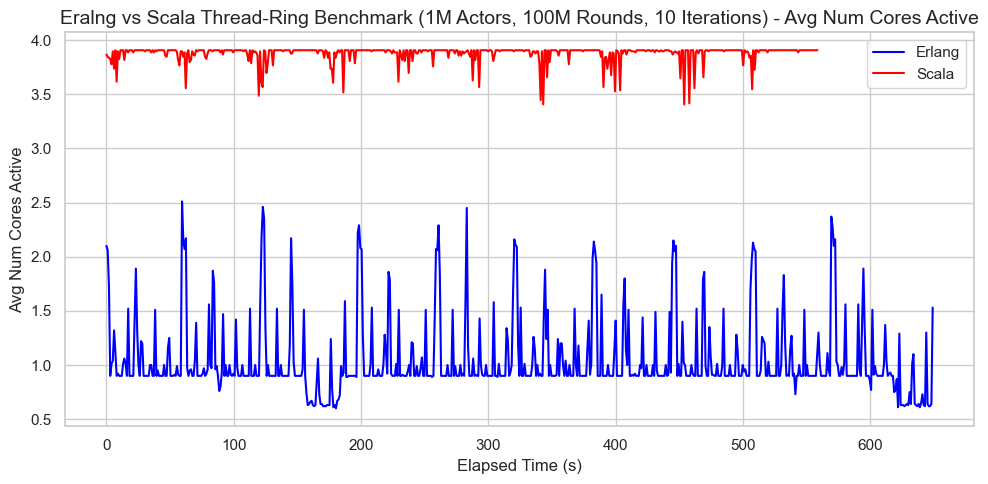

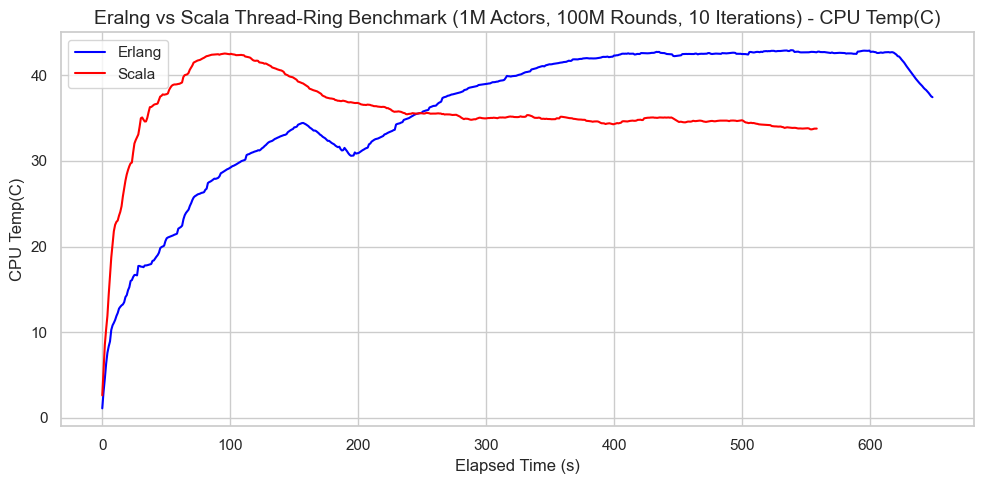

In [19]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [20]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [21]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.770018
GT Power(W)              -0.001844
DRAM Power(W)             0.878457
(CPUs+GT+SA) Power(W)    32.921698
CPU Temp(C)              35.713072
Avg Num Cores Active      3.879122
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        11.118540
GT Power(W)              -0.008170
DRAM Power(W)             0.820294
(CPUs+GT+SA) Power(W)    14.000504
CPU Temp(C)              36.047915
Avg Num Cores Active      1.053527
dtype: float64


Compute Total Energy Consumption

In [22]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/4/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 17703.88483325783 Joules
Erlang Benchmark: 7758.4860612249995 Joules
